# Avant propos
Ce notebook contient les solutions proposées en cours pour certains des exos du TD (stage de Février).

In [1]:
import numpy as np

In [60]:
import random as rd

# Max, Moyenne, Ecart Type

In [56]:
def random_liste(n,maxL=50):
    '''
        Petit utilitaire pour générer des listes aléatoirement.
    '''
    return list(np.random.choice(range(maxL),n))

In [63]:
def random_liste_bis(n,maxL=50):
    '''
        Idem, sans numpy.
    '''
    return [int(rd.random()*maxL) for i in range(n)]

In [10]:
maListe = random_liste(30)
print(maListe)

[12, 13, 7, 34, 29, 33, 11, 35, 20, 30, 46, 41, 47, 23, 20, 13, 17, 0, 31, 12, 26, 26, 26, 7, 31, 17, 3, 41, 1, 11]


In [32]:
def mon_max(l):
    if len(l) == 0:
        return
    le_max = l[0]
    for x in l:
        if x > le_max:
            le_max = x
    return le_max

In [53]:
def moyenne(l):
    if len(l) == 0:
        return 0
    somme = 0
    for x in l:
        somme += x
    return somme / len(l)

In [39]:
def ecart_type(l):
    la_moyenne = moyenne(l)
    variance = moyenne([(x-la_moyenne)**2 for x in l])
    return variance**(0.5)

In [40]:
moyenne(maListe)

22.1

In [41]:
ecart_type(maListe)

13.011149065320865

In [44]:
maListe_np = np.array(maListe)

In [45]:
maListe_np.max()

47

In [46]:
maListe_np.mean()

22.1

In [47]:
maListe_np.std()

13.011149065320865

# Rappels Récursivité

$ U_0 = 4$     
$ U_{n+1} = 3U_n$    

In [58]:
def suite_u(n):
    if n == 0:
        return 4
    return 3*suite_u(n-1)

In [55]:
suite_u(0)

4

In [59]:
suite_u(34)

6.615321624346931e+16

In [57]:
4*(3**34)

66708726798666276

# Dichotomie

In [82]:
def recherche_dicho(l,x):
    '''
        Faussement nlog(n)
    '''
    if len(l) == 0:
        return False
    if len(l) == 1:
        return l[0] == x
    
    n = len(l)
    indice_milieu = n//2
    elem_milieu = l[indice_milieu]
    
    if x == elem_milieu:
        return True
    
    if x < elem_milieu:
        return recherche_dicho(l[:indice_milieu],x)
    
    return recherche_dicho(l[indice_milieu+1:],x)

In [91]:
def recherche_dicho_bis(l,x,begin,end):
    '''
        Vrai nlog(n)
    '''
    if len(l) == 0:
        return False
    if len(l) == 1:
        return l[0] == x
    
    n = end-begin
    indice_milieu = (begin+end)//2
    elem_milieu = l[indice_milieu]
    
    if x == elem_milieu:
        return True
    
    if x < elem_milieu:
        return recherche_dicho_bis(l,x,begin,indice_milieu)
    
    return recherche_dicho_bis(l,x,indice_milieu+1,end)

In [67]:
maListe.sort()

In [152]:
maListe = random_liste(101)
maListe.sort()

In [154]:
for x in maListe:
    if not recherche_dicho_bis(maListe,x,0,len(maListe)):
        print("probleme")
print("pas de problemes")

pas de problemes


# Tri Insertion

In [135]:
def insert_in_sorted_list(sorted_l,x):
    indice_ou_mettre_x = len(sorted_l)
    
    for i in range(len(sorted_l)):
        if sorted_l[i] > x:
            indice_ou_mettre_x = i
            break
    
    sorted_l.insert(indice_ou_mettre_x,x)

In [139]:
def insertion_sort(l):
    sorted_l = []
    for x in l:
        insert_in_sorted_list(sorted_l,x)
    return sorted_l

In [142]:
maListe = random_liste(40)
print(maListe)
maListe_triee = insertion_sort(maListe)
print(maListe_triee)

[25, 22, 48, 39, 12, 35, 39, 41, 0, 40, 1, 31, 41, 45, 15, 30, 38, 23, 25, 26, 11, 34, 17, 1, 14, 45, 20, 15, 14, 25, 38, 27, 11, 35, 27, 17, 0, 2, 18, 19]
[0, 0, 1, 1, 2, 11, 11, 12, 14, 14, 15, 15, 17, 17, 18, 19, 20, 22, 23, 25, 25, 25, 26, 27, 27, 30, 31, 34, 35, 35, 38, 38, 39, 39, 40, 41, 41, 45, 45, 48]


# Mediane

In [145]:
def mediane(L):
    L_sorted = sorted(L)
    indice_milieu = len(L_sorted)//2
    
    if len(L_sorted) % 2 == 1:
        return L_sorted[indice_milieu]
    
    return (L_sorted[indice_milieu]+L_sorted[indice_milieu-1])/2

In [148]:
l = [3,2,5,6,9,7]
mediane(l)

5.5

# Tri Fusion

In [64]:
def separation(l):
    if len(l) == 0:# l == []
        return [],[]
    #if len(l) == 1: (Inutile)
        #return l,[]
    
    indice_milieu = len(l)//2
    return l[:indice_milieu],l[indice_milieu:]
        

In [60]:
def fusion(l1,l2):
    '''
        Cette fonction fusionne les listes l1 et l2 en supposant qu'elles sont 
        préalablement triées.
        e.g: [1,4,7], [2,12] -> [1,2,4,7,12]
    '''
    
    L_fusion = []
    
    i_l1 = 0
    i_l2 = 0
    
    while i_l1 < len(l1) and i_l2 < len(l2):
        if l1[i_l1] < l2[i_l2]:
            L_fusion.append(l1[i_l1])
            i_l1 += 1
        else:
            L_fusion.append(l2[i_l2])
            i_l2 += 1
    
    if i_l1 < len(l1):
        L_fusion += l1[i_l1:]
    
    if i_l2 < len(l2):
        L_fusion += l2[i_l2:]
    
    return L_fusion

In [76]:
def tri_fusion(l):
    if len(l) <= 1:
        return l
    
    l1,l2 = separation(l)
    
    return fusion(tri_fusion(l1),tri_fusion(l2))

In [77]:
maListe = random_liste(50)
print(maListe)

[21, 26, 22, 21, 38, 8, 2, 25, 11, 39, 32, 19, 36, 49, 41, 6, 37, 49, 27, 28, 24, 18, 46, 3, 8, 2, 15, 43, 44, 6, 5, 12, 27, 23, 48, 38, 0, 9, 34, 31, 14, 11, 13, 34, 18, 36, 38, 16, 18, 19]


In [78]:
print(tri_fusion(maListe))

[0, 2, 2, 3, 5, 6, 6, 8, 8, 9, 11, 11, 12, 13, 14, 15, 16, 18, 18, 18, 19, 19, 21, 21, 22, 23, 24, 25, 26, 27, 27, 28, 31, 32, 34, 34, 36, 36, 37, 38, 38, 38, 39, 41, 43, 44, 46, 48, 49, 49]


# Factorielle

$0! = 1 $    
$(n)! = (n)(n-1)!$

In [79]:
def fact_rec(n):
    if n == 0:
        return 1
    return n*fact_rec(n-1)

In [90]:
def fact(n):
    produit = 1
    for k in range(1,n+1):
        produit *= k
    return produit

In [94]:
def fact_while(n):
    produit = 1
    k = 1
    while k <= n:
        produit *= k
        k += 1
    return produit

# Coefficients Binomiaux
$C_n^k = \frac{n!}{(n-k)!k!}$      
$C_n^k = C_{n-1}^k + C_{n-1}^{k-1}$

In [104]:
def coeff_binomiaux(n,k):
    return fact(n)//(fact(n-k)*fact(k))

In [138]:
def coeff_binomiaux_pascal_rec(n,k):
    if k == 0 or n == k:
        return 1
    return coeff_binomiaux_pascal_rec(n-1,k)+coeff_binomiaux_pascal_rec(n-1,k-1)

In [141]:
import tqdm

In [149]:
def calcule_triangle_pascal(n):
    a_retourner = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(i+1):
            if j == 0:
                a_retourner[i][j] = 1
            else:
                a_retourner[i][j] =  a_retourner[i-1][j] + a_retourner[i-1][j-1]
                
    return a_retourner

In [166]:
def calcule_triangle_pascal_modulo_2(n):
    a_retourner = [[0 for j in range(n)] for i in range(2)]
    
    for i in tqdm.tqdm(range(n)):
        for j in range(i+1):
            if j == 0:
                a_retourner[i%2][j] = 1
            else:
                a_retourner[i%2][j] =  a_retourner[(i-1)%2][j] + a_retourner[(i-1)%2][j-1]
                
    return a_retourner

In [163]:
def coeff_binomiaux_pascal_iter(n,k):
    triangle_pascal = calcule_triangle_pascal_modulo_2(n+1)
    return triangle_pascal[n%2][k]

In [172]:
coeff_binomiaux(1000,3)

166167000

# Fibonacci
$ F_0 = 0 $   
$ F_{n} = F_{n-1} + F_{n-2}$ 

In [181]:
def fibo_rec(n):
    if n==0:
        return 0
    if n==1:
        return 1
    return fibo_rec(n-1) + fibo_rec(n-2)

In [187]:
def fibo_rec_lin(n):
    #blabla
    return

In [188]:
np.random.randn(1)

array([0.12717951])

In [174]:
def fibo(n):
    if n <= 1:
        return n
    u = 1,0
    for i in range(2,n+1):
        a,b = u
        u = a+b,a
    return u[0]

# Manipulation  des fichiers
## Lecture

In [190]:
f = open("training_output.csv","r")
raw_file = f.read()
f.close()

In [205]:
raw_truncated_file = raw_file[:1000]

In [248]:
valeur_boursieres = []
for i,ligne in enumerate(raw_truncated_file.split("\n")[1:]):
    colonnes = ligne.split(';')
    valeur_boursieres.append(float(colonnes[1]))

In [260]:
np.loadtxt("fichier.txt")

array([0.13416782, 0.04612618, 0.14431244, 0.13017568, 0.08587257,
       0.12272394, 0.15088466, 0.1507026 , 0.10204839, 0.16372444,
       0.10314912, 0.09938587, 0.18102687, 0.17809244, 0.10190031,
       0.16328866, 0.1063772 , 0.09569925, 0.108759  , 0.13403271,
       0.08724501, 0.14777775, 0.2499699 , 0.09630094, 0.10947703,
       0.10823848, 0.15489119, 0.08247893, 0.07073958, 0.09668169,
       0.25829083, 0.08448447, 0.07201351, 0.18541235, 0.10523932,
       0.09041269, 0.13731367, 0.0574183 , 0.07092185, 0.07495205,
       0.10035154, 0.0794551 , 0.14086413, 0.06651942, 0.04423782,
       0.11654086, 0.04888033, 0.07190511, 0.14569197, 0.1337223 ,
       0.08824189, 0.0896911 , 0.10735215, 0.12546122, 0.1111819 ])

## Ecriture
Attention, l'instruction open(mon_fichier, "w") supprime le contenu
de mon_fichier si il existe deja.

In [262]:
maListe = random_liste(40)
print(maListe)

[2, 33, 10, 13, 22, 42, 2, 27, 40, 48, 2, 28, 30, 10, 41, 47, 27, 0, 29, 44, 3, 5, 17, 47, 4, 11, 39, 13, 38, 39, 36, 17, 49, 40, 42, 39, 3, 36, 30, 23]


In [278]:
f = open("mes_donnees.txt", "w")

In [276]:
for x in maListe:
    f.write(str(x+1)+"\n")

In [277]:
f.close()

# Quick Sort
## Question 1
Coder une fonction `avant_apres_p(l,p)` qui renvoie deux listes `l1` et `l2`        
telles que `l1` contient tous les éléments de `l` inférieurs strict à  `p` et       
`l2` tous les éléments de `l` strictement supérieurs que `p`.     
## Question 2
Coder le `quicksort`. En s'inspirant de ce qui a été fait pour le tri
fusion.

In [294]:
%%time
l = [0]*100000000
l + [4]

CPU times: user 728 ms, sys: 412 ms, total: 1.14 s
Wall time: 1.14 s


In [295]:
%%time
l = [0]*100000000
l.append(4)
l

CPU times: user 278 ms, sys: 232 ms, total: 509 ms
Wall time: 510 ms


In [310]:
def avant_apres_p_stylee(l,p):
    l_avant = [x for x in l if x < p]
    l_apres = [x for x in l if x > p]
    compteur = l.count(p)
    return l_avant,l_apres,l.count(p)

In [315]:
def avant_apres_p(l,p):
    l_avant, l_apres = [],[]
    compteur = 0
    for x in l:
        if x < p:
            l_avant.append(x)
        elif x > p:
            l_apres.append(x)
        else:
            compteur += 1
    return l_avant,l_apres,compteur

In [316]:
def quicksort(l):
    if len(l) <= 1:
        return l
    
    p = l[0]
    l_avant,l_apres,compteur = avant_apres_p(l,p)
    
    return quicksort(l_avant) + [p]*compteur + quicksort(l_apres)

In [318]:
print(maListe[:10])
print(quicksort(maListe[:10]))

[2, 33, 10, 13, 22, 42, 2, 27, 40, 48]
[2, 2, 10, 13, 22, 27, 33, 40, 42, 48]


# Calcul Scientifique

In [321]:
import matplotlib.pyplot as plt

In [323]:
def f(x):
    return x - np.sin(x) - 3*np.pi/2

In [344]:
def fp(x):
    return 1-np.cos(x)

In [345]:
def newton_aux(x,f,fp):
    return x-f(x)/fp(x)

def newton(f,fp,x0,epsilon):
    a_renvoyer = [x0]
    
    xn_avant = x0
    xn = newton_aux(x0,f,fp)
    
    while abs(xn-xn_avant) > epsilon:
        a_renvoyer.append(xn)
        
        xn_avant = xn
        xn = newton_aux(xn,f,fp)
    
    return a_renvoyer

In [351]:
def tangente_de_f_en_x0(f,fp,x0,x):
    return fp(x0)*(x-x0)+f(x0)

In [352]:
iteres_de_newton = newton(f,fp,5,1e-8)
print(iteres_de_newton)
f(iteres_de_newton[-1])

[5, 3.2598499353485457, 3.9294669228282944, 3.9728987180527895, 3.97330381094423, 3.9733038471695292]


0.0

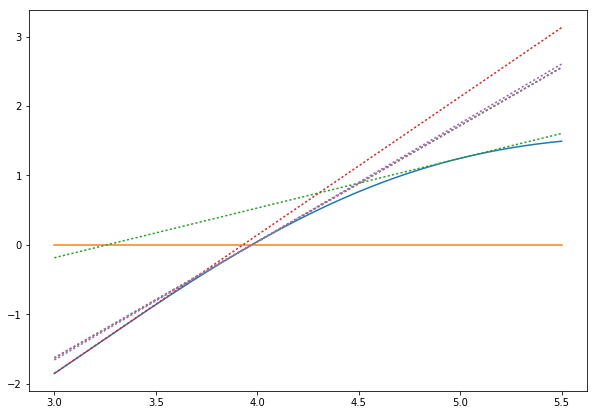

In [354]:
plt.figure(figsize=(10,7))
x_range = np.linspace(3,5.5,1000)
y = [f(x) for x in x_range]
plt.plot(x_range,y)
plt.plot(x_range,[0]*len(x_range))
for xn in iteres_de_newton:
    plt.plot(x_range,[tangente_de_f_en_x0(f,fp,xn,x) for x in x_range],linestyle=':')
plt.show()